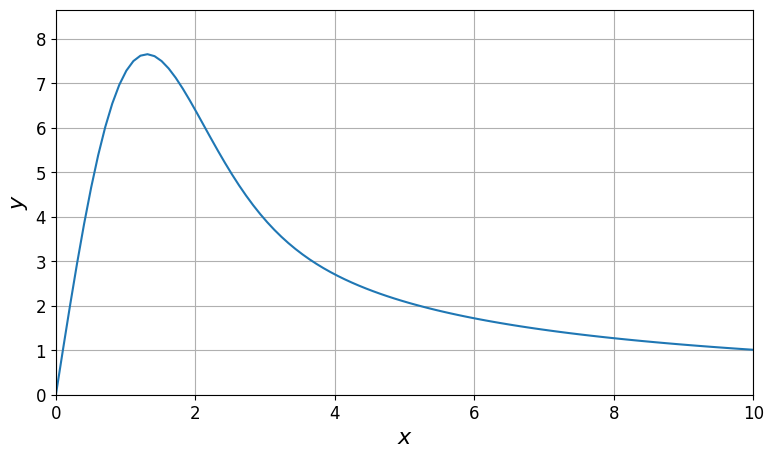

In [84]:
# Exercise 6.1
# Author: Felix Cahyadi
# Date: 23.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Make a function that solve the differential equation y'(x) + x y(x) = A
def solve_diffeq(y_arr, x_arr, y_init, A = 10, max_iter = 100):
    """This is the function that calculates the value of y'(x) + xy(x) - A

    Args:
        y_arr (NDarray): Array containing ys
        x_arr (NDarray): Array containing xs
        y_init (float): Initial value of y
        A (int, optional): The constant A in the differential equation. Defaults to 10.
        max_iter (int, optional): The maximum number of iteration that can happen. Defaults to 100.

    Returns:
        F(x,y,dy): The value of y'(x) + xy(x) - A
    """
    h = (x_arr[-1]-x_arr[0])/(len(x_arr)-1)

    # Create dy
    dy_arr = np.zeros_like(y_arr)
    dy_arr[0] = (y_arr[1] - y_arr[0])/h
    dy_arr[-1] = (y_arr[-1] - y_arr[-2])/h
    dy_arr[1:-1] = (y_arr[2:] - y_arr[0:-2])/(2*h)

    # Value from the differential equation
    val_arr = dy_arr + x_arr*y_arr - A

    # Fix the boundary condition
    val_arr[0] = y_arr[0] - y_init # This will push fsolve to fix the initial condition

    return val_arr

# Initial value
N = 100
x = np.linspace(0,10,N) # Initialize the x
y = np.zeros(N)

y_sol = fsolve(solve_diffeq, y, args=(x,0))


fig, ax = plt.subplots(figsize = (9,5))
ax.plot(x,y_sol)
ax.grid(True)
ax.set_xlim((min(x),max(x)))
ax.set_ylim((min(y_sol), max(y_sol) + 1))
ax.set_ylabel("$y$", fontsize = 16)
ax.set_xlabel("$x$", fontsize = 16)
ax.tick_params("both", labelsize = 12)

plt.show()

It takes 197779 iteration to converge.
The velocity is 48.88523195204652 m/s


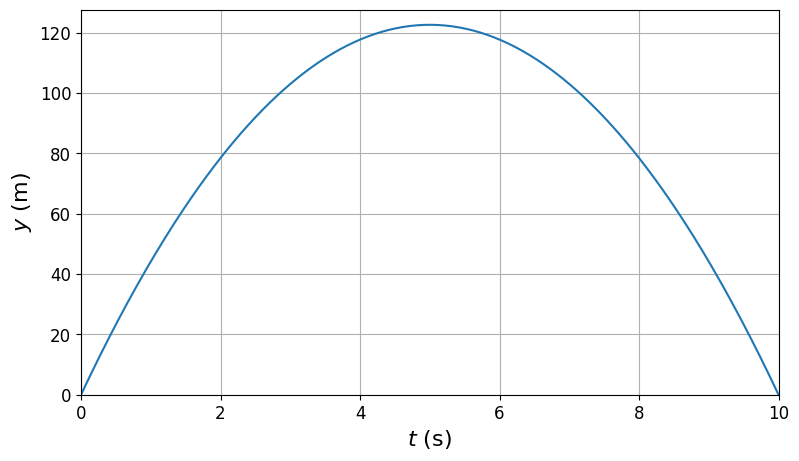

In [146]:
# Exercise 6.2
# Author: Felix Cahyadi
# Date: 23.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Make a function that solves ddy/ddt = -g
def solve_grav(y_arr, y_init, y_end, h, tol = 1e-6, max_iter = 1e6):
    """This is the function that calculates y given ddy/ddt = -g and some boundary conditions

    Args:
        y_arr (NDarray): Array containing the values of y
        y_init (float): The first boundary of y
        y_end (float): The second boundary of y
        h (float): The step size
        tol (float, optional): The tolerance that we want to achieve. Defaults to 1e-6.
        max_iter (int, optional): The maximum iteration before getting out of the loop. Defaults to 100000.

    Returns:
        y_arr: The solution of y, also prints "Doesn't converge" if it doesn't converge.
    """
    # Define constant
    g = 9.81

    # Define the boundary condition
    y_arr[0] = y_init
    y_arr[-1] = y_end
    
    # Do the looping
    for i in range(int(max_iter)):
        #print(y_arr)
        norm_prev = norm(y_arr)
        y_left = y_arr[0:-2]
        y_right = y_arr[2:]
        y_arr[1:-1] = (y_right + y_left + (h**2)*g)/2
        norm_next = norm(y_arr)
        if abs((norm_next - norm_prev)/norm_next) < tol:
            print(f"It takes {i} iteration to converge.")
            return(y_arr)
        
    print("doesn't converge")
    return(y_arr)

# Initial value
N = 300
t, h = np.linspace(0,10,N, retstep= True) # Initialize the x
y = np.zeros(N)

y_sol = solve_grav(y, y_init=0, y_end = 0, h=h, tol=1e-9, max_iter=1e8)

fig, ax = plt.subplots(figsize = (9,5))
ax.plot(t,y_sol)
ax.grid(True)
ax.set_xlim((min(t),max(t)))
ax.set_ylim((min(y_sol), max(y_sol) + 5))
ax.set_ylabel("$y$ (m)", fontsize = 16)
ax.set_xlabel("$t$ (s)", fontsize = 16)
ax.tick_params("both", labelsize = 12)

g = 9.81
v0 = (y_sol[1] - y_sol[0])/h # Find the initial velocity using finite difference

print(f"The velocity is {v0} m/s")

plt.show()

In [147]:
# Exercise 6.3
# Author: Felix Cahyadi
# Date: 23.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Create a function that returns dy and y
def diff_y(t,y,g = 9.81):
    """ Function that returns the derivatives of y

    Args:
        t (float): time
        y (NDarray): array containing y and its derivatives
        g (float, optional): Acceleration of gravity. Defaults to 9.81.

    Returns:
        dys: The derivatives of y
    """
    ddy = -g
    dy = y[-1]

    return np.array([dy, ddy])

# Create a function that returns final y given y0 using RK45
def propagate(v0, t_init, t_end, diff_y, y0):
    """ Function that calculates the final y using RK45, also makes it compatible with fsolve

    Args:
        v0 (float): The initial velocity
        t_init (float): The initial time
        t_end (float): The end time
        diff_y (function): The function that gives the derivative of y and v
        y0 (float): Initial value of y

    Returns:
        final y: The final value of y at t = 10 s
    """

    y_final = solve_ivp(diff_y, (t_init, t_end), np.array([y0, v0[0]]), method = 'RK45',max_step = 1e-1).y[0,-1]

    return y_final

# Set some initial conditions
t_init = 0
t_end = 10
v0 = 30 # This is the first guess
y0 = 0


# Solve for v0 using fsolve
v_sol = fsolve(propagate, v0, args=(t_init, t_end, diff_y, 0))

print(f"The initial velocity is: {v_sol[0]:.2f} m/s")
print(f"The value that we got from this method might be more accurate than the one that we have in 6.2.\nBecause in 6.2, I found the initial velocity using finite difference.\nThis method is way more time efficient compared to 6.2.")


The initial velocity is: 49.05 m/s
The value that we got from this method might be more accurate than the one that we have in 6.2.
Because in 6.2, I found the initial velocity using finite difference.
This method is way more time efficient compared to 6.2.


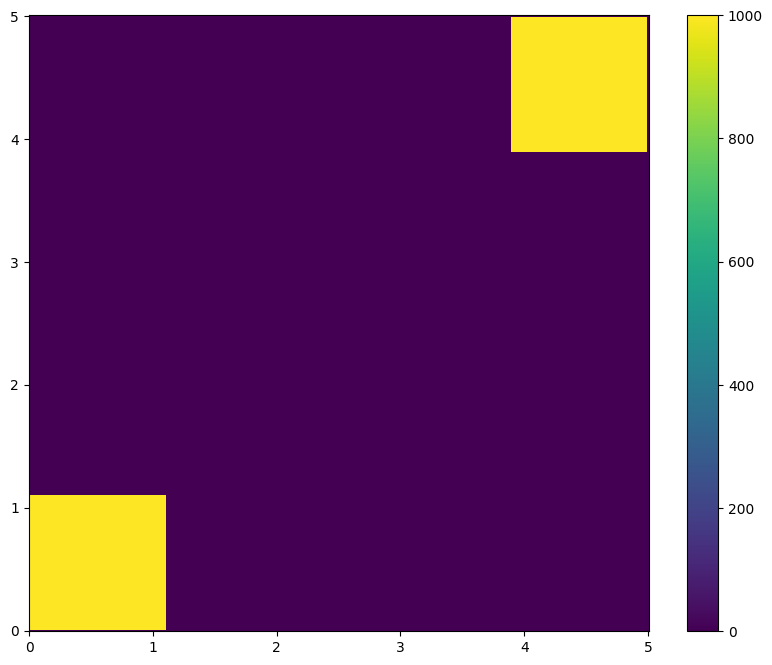

In [184]:
# Exercise 6.4
# Author: Felix Cahyadi
# Date: 23.10.2023

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from time import sleep

# Create a function that will create two square shaped areas
def place_squares(grid, val = 1000):
    side_length = grid.shape[0]
    mini_side = int(np.sqrt(0.05)*side_length)
    grid[1:mini_side,1:mini_side] = val
    grid[-mini_side:-1, -mini_side:-1] = val

# Create a function that solves the Poisson equation
def step(grid, h, val = 1000):
    top = grid[0:-2,1:-1]
    bottom = grid[2:,1:-1]
    left = grid[1:-1,0:-2]
    right = grid[1:-1,2:]
    grid[1:-1,1:-1] = top + bottom + left + right - (h**2)*val
    place_squares(grid)


# Initial values
N = 500 # Number of data points for each side
x, h= np.linspace(0,5,N, retstep=True)
y = np.linspace(0,5,N)
X,Y = np.meshgrid(x,y)
grid_field = np.zeros_like(X)
place_squares(grid_field)

fig, ax = plt.subplots(figsize = (10,8))
im = ax.pcolormesh(X,Y,grid_field)
fig.colorbar(im,ax=ax, ticks = range(0,1001,200))
plt.show()

for i in range(100):
    place_squares(grid_field)
    im.set_array(grid_field)
    sleep(1e-3)
    




